In [2]:
#To use the functionalities provided by pandas package, we should import it.
#by using import ... as ... structure, now in the program we can refer to pandas as pd
import pandas as pd
#Our plotting functions are located under the pyplot subpackage of matplotlib, so we have to import this subpackage
import matplotlib.pyplot as plt

In [3]:
#in order to read a csv file, we use read_csv(filename) function from pandas library. It reads the file and creates a
#creates a data frame from the data. A dataframe consists of rows and columns.
df = pd.read_csv("us-counties.csv")

In [4]:
#you can just print the data frame like that, but as you see there are lots of rows. All of them can't be displayes at once.
df

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0
...,...,...,...,...,...,...
67451,2020-04-17,Sublette,Wyoming,56035.0,1,0
67452,2020-04-17,Sweetwater,Wyoming,56037.0,10,0
67453,2020-04-17,Teton,Wyoming,56039.0,61,0
67454,2020-04-17,Uinta,Wyoming,56041.0,6,0


In [5]:
#To display first n rows of a dataframe, we use head(n) function.
df.head(5)

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0


In [6]:
#info() function gives us some information about dataframe such as number of entries, 
#columns, what type of data stored in those columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67456 entries, 0 to 67455
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    67456 non-null  object 
 1   county  67456 non-null  object 
 2   state   67456 non-null  object 
 3   fips    66585 non-null  float64
 4   cases   67456 non-null  int64  
 5   deaths  67456 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 3.1+ MB


In [10]:
#We may want to do operations on the data. For example, we might want to learn total deaths.
#To do that, we should first select "deaths" column.
#To select a column of a dataframe, we use dataFrameName["columnname"]
df["deaths"]

0        0
1        0
2        0
3        0
4        0
        ..
67451    0
67452    0
67453    0
67454    0
67455    0
Name: deaths, Length: 67456, dtype: int64

In [11]:
#To sum all the values, in that column we can use sum() function.
df["deaths"].sum()

313131

In [12]:
#You can also use . to select a column. dataFrame.columnName
df.cases

0         1
1         1
2         1
3         1
4         1
         ..
67451     1
67452    10
67453    61
67454     6
67455     4
Name: cases, Length: 67456, dtype: int64

In [13]:
#We may also want to display rows that satisfy a certain condition. For example, we can display the rows where deaths are higher
#than 100
#If we select deaths column and wanna check which rows are higher than 100, we use > operator. This will result a True or a False
#for each row. If the deaths>100 for the row, it will result in True, otherwise it will result in False.
df["deaths"]>100

0        False
1        False
2        False
3        False
4        False
         ...  
67451    False
67452    False
67453    False
67454    False
67455    False
Name: deaths, Length: 67456, dtype: bool

In [14]:
#As you now know we use dataFrame["..."] for selection. To select rows satisfying a certain condition, we use this syntax:
df[df["deaths"]>100]
#This might seem confusing at the moment, but it basically means select all rows which results in True
#at the end of inner operation

,date,county,state,fips,cases,deaths
9015,2020-03-23,New York City,New York,NaN,12305,131
10326,2020-03-24,New York City,New York,NaN,14905,192
11767,2020-03-25,New York City,New York,NaN,20011,280
12298,2020-03-25,King,Washington,53033.0,1360,101
13380,2020-03-26,New York City,New York,NaN,23112,365
...,...,...,...,...,...,...
66358,2020-04-17,Westchester,New York,36119.0,22476,738
66717,2020-04-17,Montgomery,Pennsylvania,42091.0,2684,135
66722,2020-04-17,Philadelphia,Pennsylvania,42101.0,8563,298
67298,2020-04-17,King,Washington,53033.0,4904,333


In [19]:
#We can also want to see the deaths according to states for example. To do that, first we group the data according to state
#then for each state, we choose the deaths column and we sum them.
df.groupby("state")["deaths"].sum()

state
Alabama                       1386
Alaska                          94
Arizona                       1655
Arkansas                       438
California                   10724
Colorado                      4209
Connecticut                   7809
Delaware                       512
District of Columbia           723
Florida                       6953
Georgia                       7213
Guam                            89
Hawaii                         104
Idaho                          429
Illinois                     10068
Indiana                       4639
Iowa                           566
Kansas                         814
Kentucky                      1430
Louisiana                    13205
Maine                          283
Maryland                      3070
Massachusetts                10407
Michigan                     20736
Minnesota                      926
Mississippi                   1367
Missouri                      1735
Montana                        115
Nebraska      

In [20]:
#To display the graphs that we will plot, we should add this to our notebook.
%matplotlib inline

In [21]:
#Assume we want to plot a line graph that dipslays deaths by date. Our x axes values will be dates and our y axes values
#will be deaths belonging to this data.
#First we need to acquire total deaths for each day. Similar to what we have done above, we will group data by dates, then we
#will select deaths column and sum the values
deaths = df.groupby("date")["deaths"].sum()
deaths

date
2020-01-21        0
2020-01-22        0
2020-01-23        0
2020-01-24        0
2020-01-25        0
              ...  
2020-04-13    23608
2020-04-14    26081
2020-04-15    28585
2020-04-16    30786
2020-04-17    32889
Name: deaths, Length: 88, dtype: int64

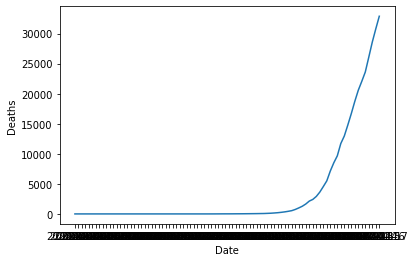

In [37]:
#As you can see in the dataframe, our dates are not unique, because the results were given state by state. To only have unique
#dates as labels, after selecting date column, we will drop duplicates.
dates = df["date"].drop_duplicates()
#To plot a line graph with pyplot, we use plt.plot(x_values, y_values) function.
plt.plot(dates, deaths)
#To put labels to axes
plt.xlabel("Date")
plt.ylabel("Deaths")
plt.show()

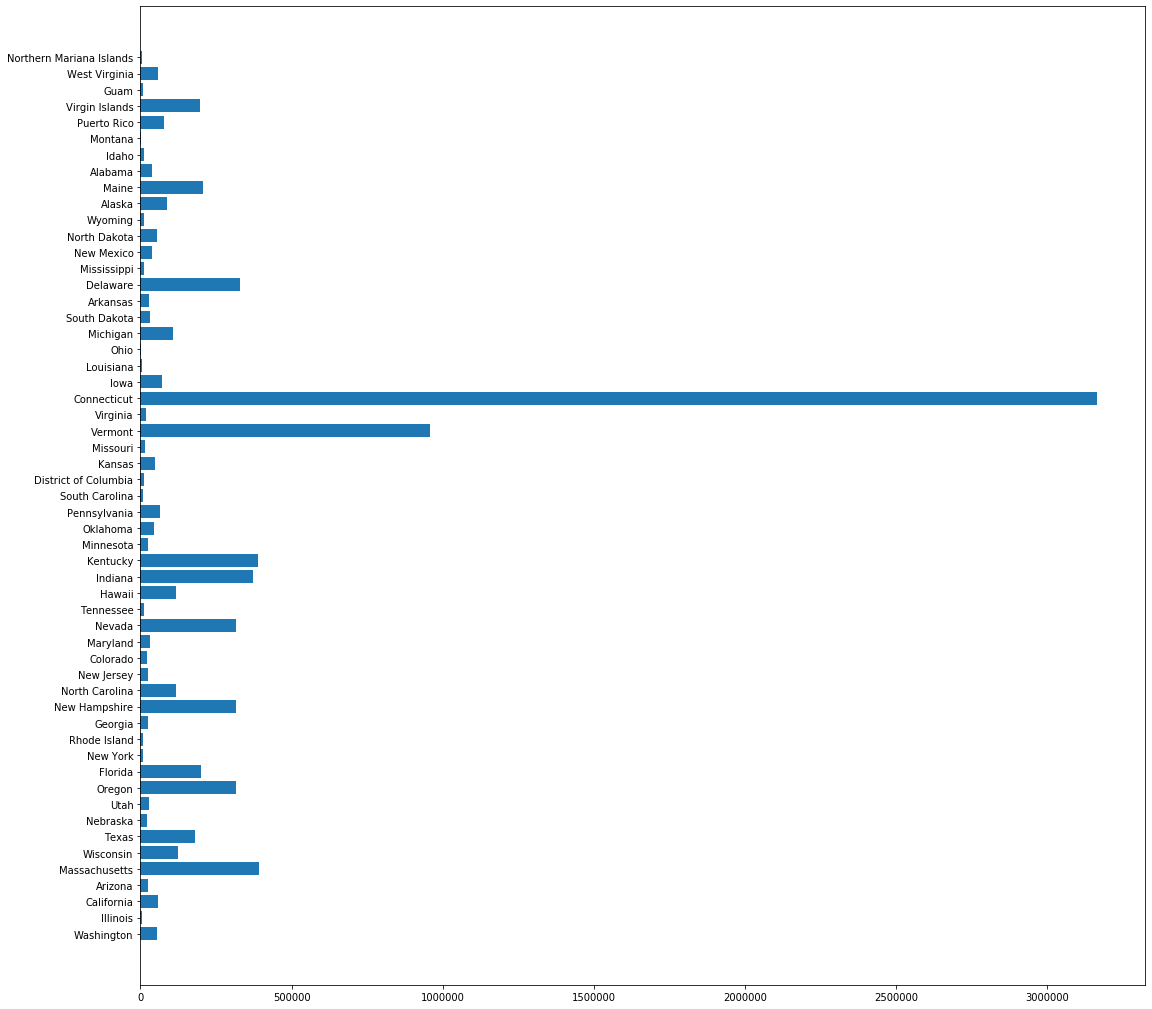

In [47]:
#We may want to see cases across states with a bar graph.
plt.subplots(figsize=(18,18)) #We can set the size of the graph like that.
plt.barh(df["state"].drop_duplicates(), df.groupby("state")["cases"].sum())
plt.show()